In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### County ID

In [15]:
cnty_id = pd.read_csv('./datasets/county_id.csv',dtype='str')
print(cnty_id.shape)
cnty_id.head()

(43934, 7)


,Summary Level,State Code,County Code,Subdivision Code,Place Code,City Code,Name
0,010,00,000,00000,00000,00000,United States
1,040,01,000,00000,00000,00000,Alabama
2,050,01,001,00000,00000,00000,Autauga County
3,050,01,003,00000,00000,00000,Baldwin County
4,050,01,005,00000,00000,00000,Barbour County


### Population

In [16]:
pop = pd.read_csv('datasets/county_census.csv')
print(pop.shape)
pop.head()

(58, 3)


,CTYNAME,Pop,GrowthRate
0,Los Angeles County,10105518,2.8820
1,San Diego County,3343364,7.7356
2,Orange County,3185968,5.6160
3,Riverside County,2450758,11.3145
4,San Bernardino County,2171603,6.4037


PO2theSteeGress.

### CGEC Powerplants

In [20]:
cgec = pd.read_csv('datasets/California_Power_Plants.csv')

In [21]:
cgec.shape

(2506, 56)

In [22]:
cgec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506 entries, 0 to 2505
Data columns (total 56 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   OBJECTID_12_13                2506 non-null   int64  
 1   Plant_ID                      2506 non-null   object 
 2   Plant_Alias                   1516 non-null   object 
 3   Plant_Label                   2506 non-null   object 
 4   MW                            2491 non-null   float64
 5   Gross_MWh                     1565 non-null   float64
 6   Net_MWh                       1548 non-null   float64
 7   General_Fuel                  2504 non-null   object 
 8   Status                        2495 non-null   object 
 9   STEP_License_Status           197 non-null    object 
 10  Gen_Count                     1808 non-null   float64
 11  Initial_Start_Date            1809 non-null   float64
 12  Online_Year                   1810 non-null   float64
 13  Ret

In [23]:
cgec['State_'].value_counts()

CA    2481
NV      11
AZ       5
MX       3
UT       3
NM       1
Name: State_, dtype: int64

In [24]:
plants = cgec[['Plant_ID','Plant_Label','MW','General_Fuel','Status','Initial_Start_Date','State_','County','Latitude','Longitude','Renewable_Energy','Service_Area','Income_Percent','CES30_Percentile']]
plants.head()

,Plant_ID,Plant_Label,MW,General_Fuel,Status,Initial_Start_Date,State_,County,Latitude,Longitude,Renewable_Energy,Service_Area,Income_Percent,CES30_Percentile
0,W0464,El Cabo,298.2,Wind,Operating,NaN,NM,Torrance,34.651112,-105.461670,1.0,NaN,NaN,NaN
1,G0178,Downieville,0.0,Gas,Retired,9.466848e+11,CA,Sierra,39.570290,-120.821224,0.0,Pacific Gas & Electric Company,69.0,38.0
2,H0429,Salmon Creek,0.5,Hydro,Operating,NaN,CA,Sierra,39.610712,-120.606095,1.0,Pacific Gas & Electric Company,69.0,38.0
3,H0226,Lower Haypress,5.0,Hydro,Operating,5.996160e+11,CA,Sierra,39.565701,-120.581694,1.0,Pacific Gas & Electric Company,69.0,38.0
4,H0623,Middle Haypress,5.0,Hydro,Operating,5.969376e+11,CA,Sierra,39.565721,-120.596900,1.0,Pacific Gas & Electric Company,69.0,38.0


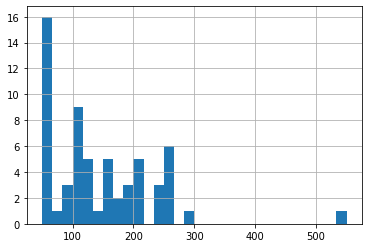

In [25]:
plants[(plants['General_Fuel']=='Solar') & (plants['Status']=='Operating') & (plants['MW']>=50)]['MW'].hist(bins=30)

In [26]:
plants[(plants['General_Fuel']=='Solar') & (plants['Status']=='Operating')]['MW'].sum()

12712.589167999999

In [27]:
plants[(plants['General_Fuel']=='Solar') & (plants['Status']=='Operating') & (plants['MW']>=100)]['MW'].sum()

7536.17

### Solar and wind plants

In [28]:
solar = cgec[(cgec['General_Fuel']=='Solar') & (cgec['Status']=='Operating')]

In [110]:
solar.to_csv('datasets/solar_plants.csv',index=False)

### County Portfolios

In [8]:
county_portfolio = pd.pivot_table(cgec,values='MW',index='County',columns='General_Fuel',aggfunc=np.sum)
county_portfolio.fillna(0,inplace=True)

In [17]:
county_portfolio['Total'] = [county_portfolio.iloc[i].sum() for i in range(county_portfolio.shape[0])]

In [18]:
county_portfolio.head()

General_Fuel,Battery,Biomass,Coal,Digester Gas,Gas,Geothermal,Hydro,Landfill Gas,MSW,Nuclear,Solar,Solar Thermal,Wind,Total
County,,,,,,,,,,,,,,
Alameda,1.4,0.00,0.0,11.05,3675.925,0.0,1.250,13.94,0.000,0.0,18.803,0.0,786.33,4508.698
Alpine,0.0,0.00,0.0,0.00,7.150,0.0,0.000,0.00,0.000,0.0,0.000,0.0,0.00,7.150
Amador,0.0,40.50,18.4,0.00,92.500,0.0,243.055,0.00,0.000,0.0,1.500,0.0,0.00,395.955
Beaver,0.0,0.00,0.0,0.00,0.000,0.0,0.000,0.00,0.000,0.0,0.000,0.0,203.50,203.500
Butte,0.0,14.88,0.0,5.00,8.400,0.0,1105.733,0.00,0.085,0.0,7.450,0.0,0.00,1141.548


In [33]:
state_portfolio

General_Fuel,Battery,Biomass,Coal,Digester Gas,Gas,Geothermal,Hydro,Landfill Gas,MSW,Nuclear,Solar,Solar Thermal,Wind,Total
State_,,,,,,,,,,,,,,
AZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,854.0,0.0,0.0,854.0
CA,134.0,1361.0,769.0,217.0,68786.0,3307.0,14111.0,431.0,157.0,4390.0,14246.0,1752.0,9478.0,119139.0
MX,0.0,0.0,0.0,0.0,2034.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155.0,2189.0
NM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,298.0,298.0
NV,0.0,0.0,818.0,0.0,536.0,60.0,2335.0,0.0,0.0,0.0,766.0,0.0,0.0,4515.0
UT,0.0,0.0,1800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,304.0,2104.0


In [35]:
county_solar = solar.groupby(by='County')['MW'].sum()

In [47]:
top_counties=county_solar[county_solar>100]

In [49]:
top_counties.sum()/county_solar.sum()

0.966304160131839

In [50]:
len(top_counties)

17

# 17 counties account for 96 percent of solar production
- use DBScan to cluster and get UV predictions for each cluster

In [61]:
main_solar = solar[(solar['County']==top_counties.index[0]) |
                   (solar['County']==top_counties.index[1]) |
                   (solar['County']==top_counties.index[2]) |
                   (solar['County']==top_counties.index[3]) |
                   (solar['County']==top_counties.index[4]) |
                   (solar['County']==top_counties.index[5]) |
                   (solar['County']==top_counties.index[6]) |
                   (solar['County']==top_counties.index[7]) |
                   (solar['County']==top_counties.index[8]) |
                   (solar['County']==top_counties.index[9]) |
                   (solar['County']==top_counties.index[10]) |
                   (solar['County']==top_counties.index[11]) |
                   (solar['County']==top_counties.index[12]) |
                   (solar['County']==top_counties.index[13]) |
                   (solar['County']==top_counties.index[14]) |
                   (solar['County']==top_counties.index[15]) |
                   (solar['County']==top_counties.index[16])
                  ]

In [64]:
main_solar['County'].value_counts()

Los Angeles        139
Kern                94
San Bernardino      90
Riverside           67
Fresno              53
Imperial            45
Sacramento          41
Tulare              34
San Diego           33
Kings               25
Monterey            12
San Luis Obispo     12
Merced              11
San Benito           5
Clark                5
Maricopa             4
Yuma                 1
Name: County, dtype: int64

### Use Clustering to group nearby power plants that should experience similar weather

/Users/Sam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


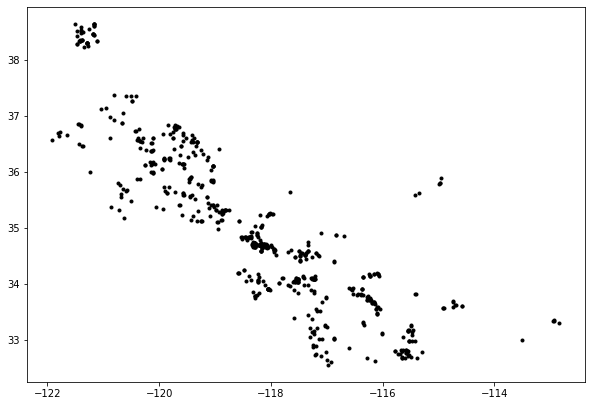

In [91]:
plt.figure(figsize=(10,10))
plt.plot(main_solar['Longitude'],main_solar['Latitude'],'k.')
plt.axes().set_aspect('equal')

In [113]:
from sklearn.cluster import KMeans

In [122]:
X = main_solar[['Longitude','Latitude']]

km = KMeans(n_clusters=30,random_state=2020)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=30, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2020, tol=0.0001, verbose=0)

In [123]:
main_solar['cluster'] = km.labels_

/Users/Sam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [124]:
def rgb_calc(minn,maxx,val):
    
    scaled = (val-minn)/(maxx-minn)

    if scaled <= 0.25:
        r = 1
        g = 4*scaled
        b = 0

    if scaled > 0.25 and scaled <= 0.5:
        r = (-4)*scaled+2;
        g = 1
        b = 0

    if scaled > 0.5 and scaled <= 0.75:
        r = 0
        g = 1
        b = 4*scaled-2

    if scaled > 0.75:
        r = 0
        g = (-4)*scaled+4
        b = 1

    return [r,g,b]

In [125]:
main_solar['color'] = main_solar['cluster'].map(lambda p: rgb_calc(0,29,p))

/Users/Sam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/Users/Sam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


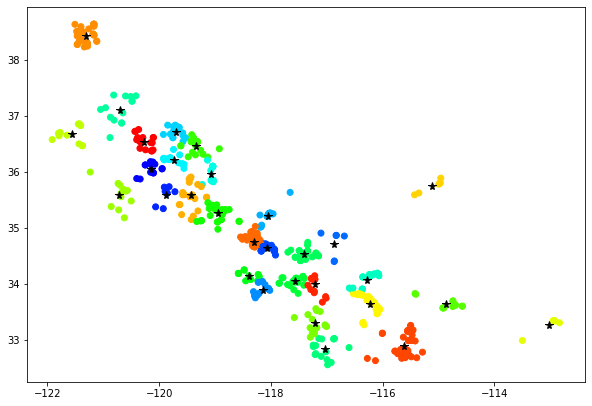

In [128]:
plt.figure(figsize=(10,10))
plt.scatter(main_solar['Longitude'],main_solar['Latitude'],c=main_solar['color'])
plt.plot(km.cluster_centers_[:,0],km.cluster_centers_[:,1],'k*',markersize=8)
plt.axes().set_aspect('equal')

In [90]:
main_solar.to_csv('datasets/main_solar.csv',index=False)

In [143]:
solar_clusters = main_solar.groupby('cluster').sum()

In [144]:
solar_clusters.head()

,OBJECTID_12_13,MW,Gross_MWh,Net_MWh,Gen_Count,Initial_Start_Date,Online_Year,Retire_Date,Peaker,Renewable_Energy,...,CES30_Percentile,Longitude,Latitude,Elevation,Operation_Job,Property_Tax,Capacity_Factor,Income_Percent,Creator_Date,Last_Editor_Date
cluster,,,,,,,,,,,,,,,,,,,,,
0,55212,766.100000,1821107.91,1808823.0,24.0,2.997173e+13,42307.0,0.000000e+00,0.0,21.0,...,1787.0,-2525.589929,767.417073,1486.457875,0.0,0.0,4.863680,943.0,33203141636826,33203141636826
1,24924,103.090000,101733.00,101688.0,19.0,2.557181e+13,38228.0,0.000000e+00,0.0,21.0,...,1449.0,-2461.490470,714.009797,7938.945555,0.0,0.0,2.724656,1417.0,33203141636826,33203141636826
2,163505,1637.707195,3116941.95,3109055.0,26.0,3.308368e+13,46343.0,0.000000e+00,0.0,47.0,...,3243.0,-5433.771418,1545.611685,1077.304956,0.0,0.0,6.046989,2590.0,74311793187182,74311793187182
3,307123,2308.260000,6015824.65,5936662.0,81.0,1.164037e+14,163197.0,0.000000e+00,0.0,83.0,...,3113.0,-9818.625140,2884.126963,63439.840042,0.0,0.0,21.155754,5827.0,131231464564598,131231464564598
4,36643,155.110000,292688.56,291896.0,41.0,5.224452e+13,80446.0,1.364688e+12,0.0,41.0,...,1977.0,-4973.471031,1575.795607,1170.949729,0.0,0.0,8.030027,4874.0,64825181290946,64825181290946


In [145]:
solar_clusters['Longitude'] = km.cluster_centers_[:,0]

In [146]:
solar_clusters['Latitude'] = km.cluster_centers_[:,1]

In [147]:
solar_clusters = solar_clusters[['Longitude','Latitude','MW']]

In [148]:
solar_clusters.head()

,Longitude,Latitude,MW
cluster,,,
0,-120.266187,36.543670,766.100000
1,-117.213832,34.000467,103.090000
2,-115.612158,32.885355,1637.707195
3,-118.296688,34.748518,2308.260000
4,-121.304171,38.434039,155.110000


/Users/Sam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


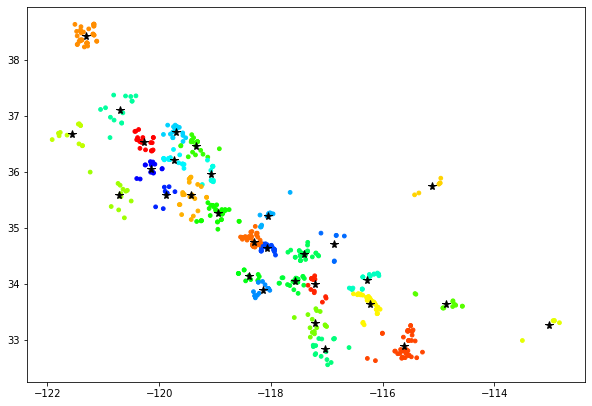

In [158]:
plt.figure(figsize=(10,10))
plt.scatter(main_solar['Longitude'],main_solar['Latitude'],c=main_solar['color'],s=14)
plt.plot(solar_clusters['Longitude'],solar_clusters['Latitude'],'k*',markersize=8)
plt.axes().set_aspect('equal')

In [152]:
solar_clusters.to_csv('datasets/solar_clusters.csv',index=False)

### Wind Clusters

In [163]:
wind = cgec[(cgec['General_Fuel']=='Wind') & (cgec['Status']=='Operating')]
print(wind.shape)
wind.head(2)

(157, 56)


,OBJECTID_12_13,Plant_ID,Plant_Alias,Plant_Label,MW,Gross_MWh,Net_MWh,General_Fuel,Status,STEP_License_Status,...,Operation_Job,Property_Tax,Capacity_Factor,Income_Percent,Project_Location,Creator,Creator_Date,Last_Editor,Last_Editor_Date,GlobalID
0,1,W0464,NaN,El Cabo,298.20,NaN,NaN,Wind,Operating,NaN,...,NaN,NaN,NaN,NaN,NaN,cecgis,1581101982706,cecgis,1581101982706,0da84d14-5867-4396-8004-5ce07b6d6dd9
347,352,W0317,,Antelope Valley - Poppy,0.01,NaN,NaN,Wind,Operating,NaN,...,NaN,NaN,NaN,85.0,Neither Low Income Nor Disadvantaged Community,cecgis,1581101982706,cecgis,1581101982706,a1070e9f-10fd-4a4d-bfee-08ce3894783f


In [166]:
wind.groupby('County')['MW'].sum().sort_values(ascending=False)

County
Kern              3526.140
Solano            1044.330
Riverside          687.850
Alameda            497.130
Torrance           298.200
Imperial           265.440
Beaver             203.500
San Diego          182.000
Contra Costa       116.200
Shasta             101.200
Millard            100.500
Merced              18.650
San Bernardino       9.015
Monterey             3.850
San Joaquin          3.500
Los Angeles          1.894
Tehama               1.000
Yolo                 1.000
Name: MW, dtype: float64